In [41]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl

import matplotlib.pyplot as plt
from IPython.display import display

import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 250)
sns.set()

# Basic info about the dataset

In [8]:
# Data info

dsdata = pd.read_csv("Telco-Customer-Churn.csv")

dsdata = dsdata.drop(dsdata.columns[0], axis=1)
ds = dsdata.copy()

display(ds.head(n=5))
ds.info()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [9]:
# Data preparation as all numerical variables

dsn = ds.copy()

dsn['SeniorCitizen'] = dsn['SeniorCitizen'].astype(str)
dsn['TotalCharges']  = pd.to_numeric(dsn.TotalCharges, errors='coerce')

nonnumvar = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

for c,var in enumerate(nonnumvar):
    dsn[var] = dsn[var].astype("category").cat.codes
    
dsn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int8
SeniorCitizen       7043 non-null int8
Partner             7043 non-null int8
Dependents          7043 non-null int8
tenure              7043 non-null int64
PhoneService        7043 non-null int8
MultipleLines       7043 non-null int8
InternetService     7043 non-null int8
OnlineSecurity      7043 non-null int8
OnlineBackup        7043 non-null int8
DeviceProtection    7043 non-null int8
TechSupport         7043 non-null int8
StreamingTV         7043 non-null int8
StreamingMovies     7043 non-null int8
Contract            7043 non-null int8
PaperlessBilling    7043 non-null int8
PaymentMethod       7043 non-null int8
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int8
dtypes: float64(2), int64(1), int8(17)
memory usage: 282.1 KB


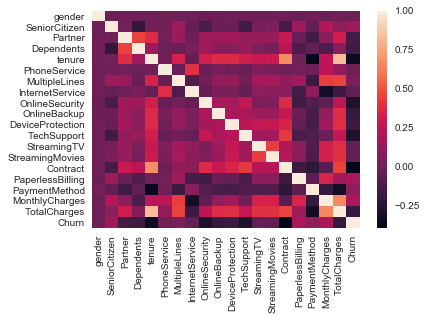

In [12]:
# Check the correlation

corr = dsn.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

# Linear Regression

In [29]:
regvar = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

reg = pd.DataFrame(dsn, columns=regvar)

pre_churn = pd.DataFrame(dsn, columns=['Churn'])
pre_tenure = pd.DataFrame(dsn, columns=['tenure'])
pre_mon = pd.DataFrame(dsn, columns=['MonthlyCharges'])

In [30]:
cmodel = sm.OLS(pre_churn, reg).fit()
cpredictions = cmodel.predict(reg)

cmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                     -13.482
Model:                            OLS   Adj. R-squared:                -13.515
Method:                 Least Squares   F-statistic:                    -408.9
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               1.00
Time:                        10:36:38   Log-Likelihood:                -3503.1
No. Observations:                7043   AIC:                             7038.
Df Residuals:                    7027   BIC:                             7148.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gender               0.0276      0.009      2.981      0.003       0.009       0.046
SeniorCitizen        0.0879      0.014      6.459      0.000       0.061       0.115
Partner             -0.0093      0.011     -0.829      0.407      -0.031       0.013
Dependents          -0.0093      0.012     -0.771      0.441      -0.033       0.014
PhoneService         0.2021      0.014     14.466      0.000       0.175       0.230
MultipleLines        0.0405      0.005      7.660      0.000       0.030       0.051
InternetService     -0.0113      0.007     -1.556      0.120      -0.026       0.003
OnlineSecurity      -0.0432      0.006     -7.159      0.000      -0.055      -0.031
OnlineBackup        -0.0295      0.006     -5.184      0.000      -0.041      -0.018
DeviceProtection    -0.0111      0.006     -1.855      0.064      -0.023       0.001
TechSupport         -0.0388      0.006     -6.222      0.000      -0.051      -0.027
StreamingTV          0.0241      0.006      3.910      0.000       0.012       0.036
StreamingMovies      0.0260      0.006      4.208      0.000       0.014       0.038
Contract            -0.1259      0.007    -17.062      0.000      -0.140      -0.111
PaperlessBilling     0.1272      0.010     12.840      0.000       0.108       0.147
PaymentMethod        0.0509      0.004     12.178      0.000       0.043       0.059
==============================================================================
Omnibus:                      754.399   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.684
Skew:                           0.609   Prob(JB):                    4.89e-127
Kurtosis:                       2.294   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
tmodel = sm.OLS(pre_tenure, reg).fit()
tpredictions = cmodel.predict(reg)

tmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tenure   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     2759.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:36:42   Log-Likelihood:                -29093.
No. Observations:                7043   AIC:                         5.822e+04
Df Residuals:                    7027   BIC:                         5.833e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gender               1.5384      0.350      4.392      0.000       0.852       2.225
SeniorCitizen        3.5042      0.515      6.805      0.000       2.495       4.514
Partner              7.6810      0.424     18.119      0.000       6.850       8.512
Dependents          -2.0394      0.457     -4.459      0.000      -2.936      -1.143
PhoneService         6.1791      0.529     11.687      0.000       5.143       7.216
MultipleLines        4.9610      0.200     24.782      0.000       4.569       5.353
InternetService     -2.0325      0.275     -7.378      0.000      -2.573      -1.492
OnlineSecurity       2.6053      0.229     11.397      0.000       2.157       3.053
OnlineBackup         4.0092      0.216     18.586      0.000       3.586       4.432
DeviceProtection     2.2944      0.227     10.094      0.000       1.849       2.740
TechSupport          0.7618      0.236      3.227      0.001       0.299       1.224
StreamingTV          1.3828      0.233      5.923      0.000       0.925       1.840
StreamingMovies      1.5682      0.233      6.718      0.000       1.111       2.026
Contract            14.3612      0.279     51.437      0.000      13.814      14.908
PaperlessBilling     3.3552      0.375      8.949      0.000       2.620       4.090
PaymentMethod       -2.6385      0.158    -16.694      0.000      -2.948      -2.329
==============================================================================
Omnibus:                       51.633   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.625
Skew:                           0.111   Prob(JB):                     2.07e-15
Kurtosis:                       3.426   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
mmodel = sm.OLS(pre_mon, reg).fit()
mpredictions = cmodel.predict(reg)

mmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         MonthlyCharges   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     5881.
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:36:48   Log-Likelihood:                -30666.
No. Observations:                7043   AIC:                         6.136e+04
Df Residuals:                    7027   BIC:                         6.147e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
gender               1.6496      0.438      3.767      0.000       0.791       2.508
SeniorCitizen        8.0224      0.644     12.461      0.000       6.760       9.284
Partner              3.3153      0.530      6.255      0.000       2.276       4.354
Dependents          -2.8610      0.572     -5.003      0.000      -3.982      -1.740
PhoneService        49.8704      0.661     75.449      0.000      48.575      51.166
MultipleLines        9.1412      0.250     36.525      0.000       8.651       9.632
InternetService    -18.3824      0.344    -53.373      0.000     -19.058     -17.707
OnlineSecurity       0.3922      0.286      1.372      0.170      -0.168       0.952
OnlineBackup         2.8307      0.270     10.497      0.000       2.302       3.359
DeviceProtection     3.2727      0.284     11.517      0.000       2.716       3.830
TechSupport          0.1174      0.295      0.398      0.691      -0.461       0.696
StreamingTV          7.3486      0.292     25.178      0.000       6.776       7.921
StreamingMovies      7.3043      0.292     25.028      0.000       6.732       7.876
Contract            -5.6671      0.349    -16.236      0.000      -6.351      -4.983
PaperlessBilling    11.6800      0.469     24.919      0.000      10.761      12.599
PaymentMethod       -0.0135      0.198     -0.068      0.945      -0.401       0.374
==============================================================================
Omnibus:                      597.567   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.961
Skew:                           0.105   Prob(JB):                     6.25e-44
Kurtosis:                       2.204   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predictive Model

Split the data into train and test dataset

In [35]:
X = reg
Y = pre_churn

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Classification - Decision tree

In [38]:
clf_detree = DecisionTreeClassifier()
clf_detree = clf_detree.fit(X_train,Y_train)


Y_pred = clf_detree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.718409843823947


## Classification - Random Forest

In [40]:
clf_rdfore = RandomForestClassifier()
clf_rdfore = clf_rdfore.fit(X_train,Y_train)

Y_pred = clf_rdfore.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7628963558920966


## Classification - other

In [43]:
classifiers = [
    KNeighborsClassifier(),
    SVC(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for c,var in enumerate(classifiers):
    clf = var
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    print(c,var,"Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

0 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') Accuracy: 0.7539044013251301
1 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) Accuracy: 0.7851396119261713
2 GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False) Accuracy: 0.7690487458589683
3 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_frac